## 1. 패키지 로딩

In [51]:
import numpy as np
import pandas as pd

## 2. 데이터 로딩

In [107]:
# "전국어린이보호구역표준데이터" CSV 파일 로딩 
df_schoolzone = pd.read_csv('./data/03/전국어린이보호구역표준데이터.csv', header=0, 
                          names=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'admi_police', 'cctv_yn', 'cctv_cnt', 'road_width', 'date_data', 'admin_cd', 'admin_nm2'], 
                          usecols=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'cctv_yn', 'cctv_cnt'],
                          dtype={'type':object, 'name':object, 'addr_road':object, 'addr_jibun':object, 'lat':float, 'lon':float, 'admin_nm':object, 'cctv_yn':object, 'cctv_cnt':object }, 
                 encoding="EUC-KR", 
                 delimiter=',' , #항목 구분자 '\t'
                 thousands = ',', #천단위 쉼표 제거   
                 index_col=None) 

In [7]:
df_schoolzone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        17472 non-null  object 
 1   name        17472 non-null  object 
 2   addr_road   17421 non-null  object 
 3   addr_jibun  13815 non-null  object 
 4   lat         17468 non-null  float64
 5   lon         17468 non-null  float64
 6   admin_nm    17472 non-null  object 
 7   cctv_yn     17472 non-null  object 
 8   cctv_cnt    12766 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.2+ MB


## 3. 전처리 - 결측치/ 형 변환/ 중복 제거

### 3.1 결측치 처리

#### 3.1.1 결측치 검토

In [3]:
# 데이터의 Null 값을 체크
#df_schoolzone.isnull().sum()
df_schoolzone.isna().sum()

type             0
name             0
addr_road       51
addr_jibun    3657
lat              4
lon              4
admin_nm         0
cctv_yn          0
cctv_cnt      4706
dtype: int64

In [4]:
# 항목별 결측치를 비율로 검토
df_schoolzone.isna().sum()/ len(df_schoolzone) * 100

type           0.000000
name           0.000000
addr_road      0.291896
addr_jibun    20.930632
lat            0.022894
lon            0.022894
admin_nm       0.000000
cctv_yn        0.000000
cctv_cnt      26.934524
dtype: float64

CCTV 건수 항목은 약 27% 정도나 NULL이 포함되어 있음을 알 수 있음 

#### 3.1.2 결측치 제거
결측치는 여러가지 방법으로 제거할 수 있다
1. 결측치가 포함된 Record를 삭제
2. 임의값 대체 적용
3. 연속 수치형 항목인 경우 평균/중위값 적용 등

##### 결측치가 포함된 Record를 삭제

In [12]:
df_schoolzone2 = df_schoolzone.dropna(axis=0) #null이 포함된 모든 행을 삭제
#df_schoolzone2 = df_schoolzone.dropna(how="any") #위와 동일 기능. 모든 컬럼이 null인 것만 지울 때에는 "all"
df_schoolzone2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10035 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        10035 non-null  object 
 1   name        10035 non-null  object 
 2   addr_road   10035 non-null  object 
 3   addr_jibun  10035 non-null  object 
 4   lat         10035 non-null  float64
 5   lon         10035 non-null  float64
 6   admin_nm    10035 non-null  object 
 7   cctv_yn     10035 non-null  object 
 8   cctv_cnt    10035 non-null  object 
dtypes: float64(2), object(7)
memory usage: 784.0+ KB


In [108]:
#특정 컬럼의 null 레코드만 삭제할 때 - 대량 데이터인 경우 복제 후에 실시할 것
df_schoolzone.dropna(subset=['cctv_cnt'],axis=0,inplace=True)
df_schoolzone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12766 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        12766 non-null  object 
 1   name        12766 non-null  object 
 2   addr_road   12725 non-null  object 
 3   addr_jibun  10079 non-null  object 
 4   lat         12763 non-null  float64
 5   lon         12763 non-null  float64
 6   admin_nm    12766 non-null  object 
 7   cctv_yn     12766 non-null  object 
 8   cctv_cnt    12766 non-null  object 
dtypes: float64(2), object(7)
memory usage: 997.3+ KB


In [21]:
df_schoolzone.isna().sum()

type             0
name             0
addr_road       41
addr_jibun    2687
lat              3
lon              3
admin_nm         0
cctv_yn          0
cctv_cnt         0
dtype: int64

##### 임의값 대체 적용

In [79]:
# 임의값 대체 적용 - 숫자형 항목인데 함부로 삭제하기 어려운 상황 등
df_schoolzone.fillna('9999', inplace=True) #null을 '9999'으로 일괄 대체 또는 df_schoolzone.fillna(value=9999) 
df_schoolzone.info()
df_schoolzone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        17472 non-null  object
 1   name        17472 non-null  object
 2   addr_road   17472 non-null  object
 3   addr_jibun  17472 non-null  object
 4   lat         17472 non-null  object
 5   lon         17472 non-null  object
 6   admin_nm    17472 non-null  object
 7   cctv_yn     17472 non-null  object
 8   cctv_cnt    17472 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.1979,127.061,경기도 오산시,Y,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.6237,127.602,청주시,Y,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.6416,127.426,청주시,Y,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.6416,127.426,청주시,Y,9999
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.6065,127.513,청주시,Y,7


### 3.2 형 변환

In [109]:
# cctv_cnt 항목을 정수형으로 변환
df_schoolzone['cctv_cnt'] = df_schoolzone['cctv_cnt'].astype(int)

In [71]:
df_schoolzone2 = df_schoolzone #데이터프레임 복제

##### 3.1.2.3 결측치 제거 - 평균 대체 적용

In [64]:
# 산술평균 - 4번째 행 비교 (2695.074462)
df_schoolzone2['cctv_cnt'] = np.where(df_schoolzone2['cctv_cnt'] == 9999, df_schoolzone2['cctv_cnt'].mean(), df_schoolzone2['cctv_cnt'])
df_schoolzone2.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.1979,127.061,경기도 오산시,Y,1.000000
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.6237,127.602,청주시,Y,3.000000
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.6416,127.426,청주시,Y,2.000000
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.6416,127.426,청주시,Y,2695.074462
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.6065,127.513,청주시,Y,7.000000


In [69]:
# 중위값 - 4번째 행 비교 (3)
df_schoolzone2['cctv_cnt'] = np.where(df_schoolzone2['cctv_cnt'] == 9999, df_schoolzone2['cctv_cnt'].median(), df_schoolzone2['cctv_cnt'])
df_schoolzone2.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.1979,127.061,경기도 오산시,Y,1.0
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.6237,127.602,청주시,Y,3.0
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.6416,127.426,청주시,Y,2.0
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.6416,127.426,청주시,Y,3.0
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.6065,127.513,청주시,Y,7.0


In [72]:
# 최빈값 - 4번째 행 비교 (3)
df_schoolzone2['cctv_cnt'] = np.where(df_schoolzone2['cctv_cnt'] == 9999, df_schoolzone2['cctv_cnt'].round(-2).mode(), df_schoolzone2['cctv_cnt'])
df_schoolzone2.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.1979,127.061,경기도 오산시,Y,1.0
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.6237,127.602,청주시,Y,3.0
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.6416,127.426,청주시,Y,2.0
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.6416,127.426,청주시,Y,3.0
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.6065,127.513,청주시,Y,7.0


In [86]:
df_schoolzone.loc[df_schoolzone.isnull()['lon'] , :]

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
8469,초등학교,동패초교(병설),경기도 파주시 한울로 21(동패동),경기도 파주시 동패동 1782번지,NaN,NaN,경기도파주시,Y,1
15744,유치원,동원초등학교병설유치원,서울특별시 중랑구 서울특별시 중랑구 송림길 114,서울특별시 중랑구 망우본동 216,37.594978,NaN,서울특별시 중랑구청,Y,NaN
16026,초등학교,무릉초등학교,강원도 영월군 수주면 중방안길 68,강원도 영월군 수주면 무릉리 893-1,NaN,NaN,강원도 영월군청,Y,4
16027,유치원,무릉초등학교병설유치원,강원도 영월군 수주면 중방안길 68,강원도 영월군 수주면 무릉리 893-1,NaN,NaN,강원도 영월군청,Y,4


* 처음부터 숫자형으로 인식된 항목은 보간(Interpolation)을 활용한 결측치 대입이 가능함

In [89]:
# 경도, 위도 항목 보간
df_schoolzone['lon'] = df_schoolzone['lon'].interpolate(method ='linear', limit_direction ='forward')
df_schoolzone['lat'] = df_schoolzone['lat'].interpolate(method ='linear', limit_direction ='forward')

In [90]:
df_schoolzone2 = df_schoolzone.loc[[8469, 15744, 16026, 16027] , :]   ##null이었던 행만 추출     
df_schoolzone2.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
8469,초등학교,동패초교(병설),경기도 파주시 한울로 21(동패동),경기도 파주시 동패동 1782번지,37.713536,126.722808,경기도파주시,Y,1
15744,유치원,동원초등학교병설유치원,서울특별시 중랑구 서울특별시 중랑구 송림길 114,서울특별시 중랑구 망우본동 216,37.594978,127.079704,서울특별시 중랑구청,Y,NaN
16026,초등학교,무릉초등학교,강원도 영월군 수주면 중방안길 68,강원도 영월군 수주면 무릉리 893-1,37.241460,128.325568,강원도 영월군청,Y,4
16027,유치원,무릉초등학교병설유치원,강원도 영월군 수주면 중방안길 68,강원도 영월군 수주면 무릉리 893-1,37.210904,128.383524,강원도 영월군청,Y,4


위의 무릉초등학교와 무릉초병설유치원은 같은 주소...동일 좌표는 아니나 영월군에는 속함....요구되는 데이터의 공간해상도(정확도) 수준에 따라...

### 3.3 중복 데이터 삭제

In [101]:
df_schoolzone.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,NaN
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7


In [94]:
# 선택 항목의 중복 레코드를 array로 제공
df_schoolzone['addr_road'].unique()

array(['경기도 오산시 외삼미로 152번길 2(외삼미동)', '충청북도 청주시 상당구 낭성면 낭성시내길 5',
       '충청북도 청주시 흥덕구 대농로 42 (복대동)', ..., '경기도 용인시 기흥구 농서로 162(농서동)',
       '경기도 용인시 기흥구 한보라2로 85-5(보라동)', '경기도 용인시 처인구 한터로275번길 35(고림동)'],
      dtype=object)

In [102]:
#중복 데이터를 True, False로 체크해주는 다른 방식
df_schoolzone2 = df_schoolzone.duplicated(['addr_road'])  #여러 행을 적용해도 됨
df_schoolzone2.head()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [105]:
##중복 데이터를 제거
#keep = 'first' #첫번째 레코드를 남김
#keep = 'last' #마지막 레코들를 남김
#keep = False  #중복은 모두 제거
df_schoolzone2 = df_schoolzone.drop_duplicates(['lat', 'lon'], keep = 'first')  #위도, 경도 좌표 모두 중복되는 데이터를 제거
df_schoolzone2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14272 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        14272 non-null  object 
 1   name        14272 non-null  object 
 2   addr_road   14231 non-null  object 
 3   addr_jibun  11709 non-null  object 
 4   lat         14272 non-null  float64
 5   lon         14272 non-null  float64
 6   admin_nm    14272 non-null  object 
 7   cctv_yn     14272 non-null  object 
 8   cctv_cnt    10430 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


## 4. 정규화

다수의 연속형 수치데이터 컬럼간에 비교를 하기 위해서 정규화가 필요함.   
특히, 머신러닝 알고리즘을 적용하기 위해서는 다수 변수(항목/컬럼)을 동일한 범위값으로 적용하는 과정이 필수적임

In [ ]:
# "전국어린이보호구역표준데이터" CSV 파일 로딩 
df_schoolzone = pd.read_csv('./data/03/전국어린이보호구역표준데이터.csv', header=0, 
                          names=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'admi_police', 'cctv_yn', 'cctv_cnt', 'road_width', 'date_data', 'admin_cd', 'admin_nm2'], 
                          usecols=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'cctv_yn', 'cctv_cnt'],
                          dtype={'type':object, 'name':object, 'addr_road':object, 'addr_jibun':object, 'lat':float, 'lon':float, 'admin_nm':object, 'cctv_yn':object, 'cctv_cnt':object }, 
                 encoding="EUC-KR", 
                 delimiter=',' , #항목 구분자 '\t'
                 thousands = ',', #천단위 쉼표 제거   
                 index_col=None) 

#특정 컬럼의 null 레코드만 삭제할 때 - 대량 데이터인 경우 복제 후에 실시할 것
df_schoolzone.dropna(subset=['cctv_cnt'],axis=0,inplace=True)

# cctv_cnt 항목을 정수형으로 변환
df_schoolzone['cctv_cnt'] = df_schoolzone['cctv_cnt'].astype(int)

### 4.1 Single Feature Scaling

In [168]:
df_schoolzone2['cctv_cnt_scale'] = df_schoolzone2['cctv_cnt'] / df_schoolzone2['cctv_cnt'].max()
df_schoolzone2.head()

,index,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt_scale
0,0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,0.1
1,1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,0.3
2,2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,0.2
3,4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,0.7
4,6,어린이집,금천아람어린이집,충청북도 청주시 상당구 쇠내로125번길 28 (금천동),충청북도 청주시 상당구 금천동115-85,36.622624,127.507694,청주시,Y,2,0.2


In [169]:
df_schoolzone2.describe()

,index,lat,lon,cctv_cnt,cctv_cnt_scale
count,12485.000000,12482.000000,12482.000000,12485.000000,12485.000000
mean,8971.398158,36.483209,127.590071,2.324790,0.232479
std,5094.698058,0.963625,0.861058,2.035294,0.203529
min,0.000000,34.295819,124.661632,0.000000,0.000000
25%,4413.000000,35.595801,126.945789,1.000000,0.100000
50%,9235.000000,36.537464,127.222156,2.000000,0.200000
75%,13353.000000,37.449667,128.337982,3.000000,0.300000
max,17471.000000,38.542101,129.557283,10.000000,1.000000


### 4.2 Min-Max Scaling (최소-최대 정규화)  
(X - MIN) / (MAX-MIN)  
이상치(Outlier) 영향을 많이 받는다는 단점이 있음

In [176]:
df_schoolzone2['cctv_cnt_scale'] = (df_schoolzone2['cctv_cnt'] - df_schoolzone2['cctv_cnt'].min()) \
    / (df_schoolzone2['cctv_cnt'].max() - df_schoolzone2['cctv_cnt'].min())  #\는 코드 내에서 줄넘김 용도
df_schoolzone2.head()

,index,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt_scale
0,0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,0.1
1,1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,0.3
2,2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,0.2
3,4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,0.7
4,6,어린이집,금천아람어린이집,충청북도 청주시 상당구 쇠내로125번길 28 (금천동),충청북도 청주시 상당구 금천동115-85,36.622624,127.507694,청주시,Y,2,0.2


In [177]:
df_schoolzone2.describe()

,index,lat,lon,cctv_cnt,cctv_cnt_scale
count,12485.000000,12482.000000,12482.000000,12485.000000,12485.000000
mean,8971.398158,36.483209,127.590071,2.324790,0.232479
std,5094.698058,0.963625,0.861058,2.035294,0.203529
min,0.000000,34.295819,124.661632,0.000000,0.000000
25%,4413.000000,35.595801,126.945789,1.000000,0.100000
50%,9235.000000,36.537464,127.222156,2.000000,0.200000
75%,13353.000000,37.449667,128.337982,3.000000,0.300000
max,17471.000000,38.542101,129.557283,10.000000,1.000000


### 4.3 Z-score Scaling  (Z 점수 정규화)  - 표준화
(X - 평균) / 표준편차  
0을 기준으로 평균보다 작은 값은 음수, 평균보다 큰 값을 양수로 변환됨    
표준화는 데이터의 분산 정도나 이상치를 검토하는 데 사용

In [182]:
df_schoolzone2['cctv_cnt_scale'] = (df_schoolzone2['cctv_cnt']-df_schoolzone2['cctv_cnt'].mean()) / df_schoolzone2['cctv_cnt'].std()
df_schoolzone2.head()

,index,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt_scale
0,0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,-0.650908
1,1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,0.331751
2,2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,-0.159579
3,4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,2.297069
4,6,어린이집,금천아람어린이집,충청북도 청주시 상당구 쇠내로125번길 28 (금천동),충청북도 청주시 상당구 금천동115-85,36.622624,127.507694,청주시,Y,2,-0.159579


In [183]:
df_schoolzone2.describe()

,index,lat,lon,cctv_cnt,cctv_cnt_scale
count,12485.000000,12482.000000,12482.000000,12485.000000,1.248500e+04
mean,8971.398158,36.483209,127.590071,2.324790,-5.684235e-16
std,5094.698058,0.963625,0.861058,2.035294,1.000000e+00
min,0.000000,34.295819,124.661632,0.000000,-1.142238e+00
25%,4413.000000,35.595801,126.945789,1.000000,-6.509084e-01
50%,9235.000000,36.537464,127.222156,2.000000,-1.595788e-01
75%,13353.000000,37.449667,128.337982,3.000000,3.317508e-01
max,17471.000000,38.542101,129.557283,10.000000,3.771058e+00


### 4.4 Log Scaling

In [189]:
#import numpy as np     #numpy의 log 함수를 이용하여 스케일링
df_schoolzone2['cctv_cnt_scale'] = df_schoolzone2['cctv_cnt'].apply(lambda x: np.log(x) if x != 0 else 0)
df_schoolzone2.head()

,index,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt_scale
0,0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,0.000000
1,1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,1.098612
2,2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,0.693147
3,4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,1.945910
4,6,어린이집,금천아람어린이집,충청북도 청주시 상당구 쇠내로125번길 28 (금천동),충청북도 청주시 상당구 금천동115-85,36.622624,127.507694,청주시,Y,2,0.693147


In [190]:
df_schoolzone2.describe()

,index,lat,lon,cctv_cnt,cctv_cnt_scale
count,12485.000000,12482.000000,12482.000000,12485.000000,12485.000000
mean,8971.398158,36.483209,127.590071,2.324790,0.642641
std,5094.698058,0.963625,0.861058,2.035294,0.676487
min,0.000000,34.295819,124.661632,0.000000,0.000000
25%,4413.000000,35.595801,126.945789,1.000000,0.000000
50%,9235.000000,36.537464,127.222156,2.000000,0.693147
75%,13353.000000,37.449667,128.337982,3.000000,1.098612
max,17471.000000,38.542101,129.557283,10.000000,2.302585


### 4.5 Scikit-Learn 패키지의 Min-Max Scaler 활용

In [231]:
from sklearn.preprocessing import MinMaxScaler  #0~1로 정규화

ss = MinMaxScaler() # 정규화를 실행할 오브젝트를 생성
# fit_transform 함수는 fit 함수(정규화 하기위한 준비 계산)와 transform 함수 (준비된 정보에서 정규화 변환 처리를 실행)를 모두 실행
df_schoolzone2['cctv_cnt_scale'] = ss.fit_transform(df_schoolzone2[['cctv_cnt']])  

In [203]:
df_schoolzone2.head()

,index,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt_scale
0,0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,0.1
1,1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,0.3
2,2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,0.2
3,4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,0.7
4,6,어린이집,금천아람어린이집,충청북도 청주시 상당구 쇠내로125번길 28 (금천동),충청북도 청주시 상당구 금천동115-85,36.622624,127.507694,청주시,Y,2,0.2


In [204]:
df_schoolzone2.describe()

,index,lat,lon,cctv_cnt,cctv_cnt_scale
count,12485.000000,12482.000000,12482.000000,12485.000000,12485.000000
mean,8971.398158,36.483209,127.590071,2.324790,0.232479
std,5094.698058,0.963625,0.861058,2.035294,0.203529
min,0.000000,34.295819,124.661632,0.000000,0.000000
25%,4413.000000,35.595801,126.945789,1.000000,0.100000
50%,9235.000000,36.537464,127.222156,2.000000,0.200000
75%,13353.000000,37.449667,128.337982,3.000000,0.300000
max,17471.000000,38.542101,129.557283,10.000000,1.000000


## 5. 추출/ 이상치 

특정 조건을 만족하는 데이터를 추출하거나, 특히 이상치를 제거하는 목적으로 많이 활용하게 됨

In [283]:
# "전국어린이보호구역표준데이터" CSV 파일 로딩 
df_schoolzone = pd.read_csv('./data/03/전국어린이보호구역표준데이터.csv', header=0, 
                          names=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'admi_police', 'cctv_yn', 'cctv_cnt', 'road_width', 'date_data', 'admin_cd', 'admin_nm2'], 
                          usecols=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'cctv_yn', 'cctv_cnt'],
                          dtype={'type':object, 'name':object, 'addr_road':object, 'addr_jibun':object, 'lat':float, 'lon':float, 'admin_nm':object, 'cctv_yn':object, 'cctv_cnt':object }, 
                 encoding="EUC-KR", 
                 delimiter=',' , #항목 구분자 '\t'
                 thousands = ',', #천단위 쉼표 제거   
                 index_col=None) 

#특정 컬럼의 null 레코드만 삭제할 때 - 대량 데이터인 경우 복제 후에 실시할 것
df_schoolzone.dropna(subset=['cctv_cnt'],axis=0,inplace=True)

# cctv_cnt 항목을 정수형으로 변환
df_schoolzone['cctv_cnt'] = df_schoolzone['cctv_cnt'].astype(int)

### 5.1 이상치 탐색

In [ ]:
df_schoolzone.describe()

### 5.2 조건검색을 통한 추출

In [ ]:
# 특정 범위의 수치 데이터만 추출
vmin = -0.748 
vmax = 4.748
df_schoolzone['cctv_cnt2'] = df_schoolzone['cctv_cnt'].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)

In [284]:
# sigu(시군구 명칭)에서 '구', '군'으로 끝나는 데이터가 아닌 것만 추출. 즉, 시로 끝나는 데이터만 추출
df_schoolzone['admin_nm2'] = df_schoolzone['admin_nm'].str[-1:]
df_schoolzone = df_schoolzone[df_schoolzone['admin_nm2'].str.contains('군')!=True]  
df_schoolzone = df_schoolzone[df_schoolzone['admin_nm2'].str.contains('구')!=True]  
df_schoolzone.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,admin_nm2
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,시
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,시
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,시
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,시
6,어린이집,금천아람어린이집,충청북도 청주시 상당구 쇠내로125번길 28 (금천동),충청북도 청주시 상당구 금천동115-85,36.622624,127.507694,청주시,Y,2,시


In [285]:
df_schoolzone.tail()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,admin_nm2
17467,유치원,고은유치원,경기도 용인시 처인구 포곡읍 석성로1069번길 8,경기도 용인시 처인구 포곡읍 영문리 31-5,37.275912,127.213753,경기도 용인시,Y,1,시
17468,유치원,해오름유치원,경기도 용인시 처인구 낙은로97번길 19(역북동),경기도 용인시 처인구 역북동 310-4,37.241994,127.192294,경기도 용인시,Y,1,시
17469,어린이집,기흥삼성어린이집,경기도 용인시 기흥구 농서로 162(농서동),경기도 용인시 기흥구 농서동 158,37.225215,127.081169,경기도 용인시,Y,1,시
17470,어린이집,딸기어린이집,경기도 용인시 기흥구 한보라2로 85-5(보라동),경기도 용인시 기흥구 보라동 222-2,37.249619,127.112570,경기도 용인시,Y,1,시
17471,유치원,파랑새유치원,경기도 용인시 처인구 한터로275번길 35(고림동),경기도 용인시 처인구 고림동 120-4,37.257561,127.236233,경기도 용인시,Y,1,시


In [298]:
# 문자열 리스트 조건 선택
df_schoolzone2 =  df_schoolzone[df_schoolzone['admin_nm'].isin(['경기도 용인시', '경기도 오산시'])]  
df_schoolzone2.info()
df_schoolzone2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 17471
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        328 non-null    object 
 1   name        328 non-null    object 
 2   addr_road   328 non-null    object 
 3   addr_jibun  327 non-null    object 
 4   lat         328 non-null    float64
 5   lon         328 non-null    float64
 6   admin_nm    328 non-null    object 
 7   cctv_yn     328 non-null    object 
 8   cctv_cnt    328 non-null    int32  
 9   admin_nm2   328 non-null    object 
dtypes: float64(2), int32(1), object(7)
memory usage: 26.9+ KB


,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,admin_nm2
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,시
517,어린이집,예인나라어린이집,경기도 오산시 북삼미로 259-18(외삼미동),경기도 오산시 외삼미동 179-7,37.197682,127.057759,경기도 오산시,Y,1,시
3875,초등학교,오산고현초등학교,경기도 오산시 남부대로 459 (고현동),경기도 오산시 고현동 92,37.133417,127.085145,경기도 오산시,Y,2,시
3876,초등학교,오산대원초등학교,경기도 오산시 경기대로25번길 45 (갈곶동),경기도 오산시 갈곶동 258,37.130553,127.071191,경기도 오산시,Y,2,시
3877,초등학교,오산원당초등학교,경기도 오산시 부원로87번길 37-7 (원동),경기도 오산시 원동 30-22,37.142265,127.090958,경기도 오산시,Y,2,시


In [297]:
df_schoolzone2.tail()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,admin_nm2
17467,유치원,고은유치원,경기도 용인시 처인구 포곡읍 석성로1069번길 8,경기도 용인시 처인구 포곡읍 영문리 31-5,37.275912,127.213753,경기도 용인시,Y,1,시
17468,유치원,해오름유치원,경기도 용인시 처인구 낙은로97번길 19(역북동),경기도 용인시 처인구 역북동 310-4,37.241994,127.192294,경기도 용인시,Y,1,시
17469,어린이집,기흥삼성어린이집,경기도 용인시 기흥구 농서로 162(농서동),경기도 용인시 기흥구 농서동 158,37.225215,127.081169,경기도 용인시,Y,1,시
17470,어린이집,딸기어린이집,경기도 용인시 기흥구 한보라2로 85-5(보라동),경기도 용인시 기흥구 보라동 222-2,37.249619,127.112570,경기도 용인시,Y,1,시
17471,유치원,파랑새유치원,경기도 용인시 처인구 한터로275번길 35(고림동),경기도 용인시 처인구 고림동 120-4,37.257561,127.236233,경기도 용인시,Y,1,시


### 5.3 표준편차를 이용한 예외값(이상치) 제거   
참조 : https://ko.wikipedia.org/wiki/68-95-99.7_%EA%B7%9C%EC%B9%99 

In [273]:
#import numpy as np
#2는 약 95%, 3을 적용하면 약 99.73%
df_schoolzone2 = \
    df_schoolzone[(abs(df_schoolzone['cctv_cnt'] - np.mean(df_schoolzone['cctv_cnt'])) / np.std(df_schoolzone['cctv_cnt']) <= 2) ].reset_index()

In [274]:
df_schoolzone2.info()
df_schoolzone2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12259 entries, 0 to 12258
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       12259 non-null  int64  
 1   type        12259 non-null  object 
 2   name        12259 non-null  object 
 3   addr_road   12225 non-null  object 
 4   addr_jibun  9605 non-null   object 
 5   lat         12256 non-null  float64
 6   lon         12256 non-null  float64
 7   admin_nm    12259 non-null  object 
 8   cctv_yn     12259 non-null  object 
 9   cctv_cnt    12259 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 910.0+ KB


,index,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1
1,1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3
2,2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2
3,4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7
4,6,어린이집,금천아람어린이집,충청북도 청주시 상당구 쇠내로125번길 28 (금천동),충청북도 청주시 상당구 금천동115-85,36.622624,127.507694,청주시,Y,2


In [275]:
df_schoolzone2.describe()

,index,lat,lon,cctv_cnt
count,12259.000000,12256.000000,12256.000000,12259.000000
mean,8983.992985,36.482486,127.589276,2.193817
std,5095.025376,0.963212,0.862783,1.807363
min,0.000000,34.295819,124.661632,0.000000
25%,4420.500000,35.603136,126.943652,1.000000
50%,9258.000000,36.522624,127.218902,2.000000
75%,13358.500000,37.450400,128.344159,3.000000
max,17471.000000,38.542101,129.557283,8.000000


### 5.4 표준화를 활용한 이상치 제거
Scipy에서 지원하는 Z-score를 이용하여 표준화값에서 표준편차의 n배 이내의 값만 적용

In [280]:
from scipy.stats import zscore
df_schoolzone['zscore_cctv_cnt'] = zscore(df_schoolzone['cctv_cnt'])

In [281]:
threshold = 2 #2는 약 95%, 3을 적용하면 약 99.73%
df_schoolzone['outliers'] = np.where((df_schoolzone['zscore_cctv_cnt'] - threshold > 0), True, np.where(df_schoolzone['zscore_cctv_cnt'] + threshold < 0, True, False))
df_schoolzone.drop(df_schoolzone[df_schoolzone['outliers'] == True].index,inplace=True)
df_schoolzone.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,zscore_cctv_cnt,outliers
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,-0.578184,False
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,0.149699,False
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,-0.214242,False
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,1.605464,False
6,어린이집,금천아람어린이집,충청북도 청주시 상당구 쇠내로125번길 28 (금천동),충청북도 청주시 상당구 금천동115-85,36.622624,127.507694,청주시,Y,2,-0.214242,False


In [282]:
df_schoolzone.info()
df_schoolzone.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 17471
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             12485 non-null  object 
 1   name             12485 non-null  object 
 2   addr_road        12449 non-null  object 
 3   addr_jibun       9811 non-null   object 
 4   lat              12482 non-null  float64
 5   lon              12482 non-null  float64
 6   admin_nm         12485 non-null  object 
 7   cctv_yn          12485 non-null  object 
 8   cctv_cnt         12485 non-null  int32  
 9   zscore_cctv_cnt  12485 non-null  float64
 10  outliers         12485 non-null  bool   
dtypes: bool(1), float64(3), int32(1), object(6)
memory usage: 1.0+ MB


,lat,lon,cctv_cnt,zscore_cctv_cnt
count,12482.000000,12482.000000,12485.000000,12485.000000
mean,36.483209,127.590071,2.324790,-0.096038
std,0.963625,0.861058,2.035294,0.740728
min,34.295819,124.661632,0.000000,-0.942125
25%,35.595801,126.945789,1.000000,-0.578184
50%,36.537464,127.222156,2.000000,-0.214242
75%,37.449667,128.337982,3.000000,0.149699
max,38.542101,129.557283,10.000000,2.697289


## 6. 구조 변환

다양한 분석을 위해서 데이터프레임 구조를 바꿀 필요가 있음

### 6.1 정렬

In [206]:
# 특정 항목을 지정하여 정렬 - ascending=False는 내림차순
df_schoolzone3 = df_schoolzone2.sort_values(by = 'cctv_cnt_scale', ascending=False)  
df_schoolzone3.head()

,index,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt_scale
2799,3994,초등학교,쌍봉초등학교,전라남도 여수시 흥국로 47,전라남도 여수시 학동 249,34.764001,127.667960,전라남도 여수시청,Y,10,1.0
11718,16580,유치원,화진초교병설유치원,울산광역시 동구 방어진순환도로 543,울산광역시 동구 방어동 75,35.491448,129.425488,울산 동구청,Y,10,1.0
7046,10372,유치원,동신초등학교병설유치원,전라북도 전주시 덕진구 우아9길 1,전라북도 전주시 덕진구 우아동3가 743-149,35.851821,127.156394,전라북도 전주시,Y,10,1.0
11717,16579,초등학교,화진초교,울산광역시 동구 방어진순환도로 543,울산광역시 동구 방어동 75,35.491448,129.425488,울산 동구청,Y,10,1.0
1147,1662,초등학교,주약초등학교,경상남도 진주시 천수로 64,경상남도 진주시 주약동 360-12,35.172116,128.091638,경상남도 진주시청,Y,10,1.0
3042,4315,유치원,탄벌초등학교 병설유치원,경기도 광주시 이배재로 20-12,경기도 광주시 탄벌동 27-44,37.420182,127.248506,경기도 광주시청,Y,10,1.0
6581,9676,초등학교,횡성초등학교,강원도 횡성군 횡성읍 교항북로 35,강원도 횡성군 읍하리 251-2,37.487043,127.979924,횡성군,Y,10,1.0
3041,4314,초등학교,탄벌초등학교,경기도 광주시 이배재로 20-12,경기도 광주시 탄벌동 27-44,37.420182,127.248506,경기도 광주시청,Y,10,1.0
4623,6569,초등학교,송림초교,경기도 수원시 장안구 대평로51번길 65,경기도 수원시 장안구 정자동 889-1,37.291282,126.991736,경기도 수원시청,Y,10,1.0
3616,5160,초등학교,경산압량초등학교,경상북도 경산시 압독로2로 38,경상북도 경산시 압량면 부적리 601,35.842578,128.761058,경상북도 경산시,Y,10,1.0


In [207]:
# 인덱스 번호 순으로 정렬 - ascending=True는 오름차순 
df_schoolzone3 = df_schoolzone2.sort_index(axis=0, ascending=True)
df_schoolzone3.head()

,index,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt_scale
0,0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,0.1
1,1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,0.3
2,2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,0.2
3,4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,0.7
4,6,어린이집,금천아람어린이집,충청북도 청주시 상당구 쇠내로125번길 28 (금천동),충청북도 청주시 상당구 금천동115-85,36.622624,127.507694,청주시,Y,2,0.2


### 6.2 집계/ 축소  
Pandas Cheat Sheet의 Group Data 참조

In [362]:
# "전국어린이보호구역표준데이터" CSV 파일 로딩 
df_schoolzone = pd.read_csv('./data/03/전국어린이보호구역표준데이터.csv', header=0, 
                          names=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'admi_police', 'cctv_yn', 'cctv_cnt', 'road_width', 'date_data', 'admin_cd', 'admin_nm2'], 
                          usecols=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'cctv_yn', 'cctv_cnt'],
                          dtype={'type':object, 'name':object, 'addr_road':object, 'addr_jibun':object, 'lat':float, 'lon':float, 'admin_nm':object, 'cctv_yn':object, 'cctv_cnt':object }, 
                 encoding="EUC-KR", 
                 delimiter=',' , #항목 구분자 '\t'
                 thousands = ',', #천단위 쉼표 제거   
                 index_col=None) 

#특정 컬럼의 null 레코드만 삭제할 때 - 대량 데이터인 경우 복제 후에 실시할 것
df_schoolzone.dropna(subset=['cctv_cnt'],axis=0,inplace=True)

# cctv_cnt 항목을 정수형으로 변환
df_schoolzone['cctv_cnt'] = df_schoolzone['cctv_cnt'].astype(int)

In [354]:
df2 = df_schoolzone.groupby(['admin_nm', 'type'])['cctv_cnt'].agg('sum').reset_index() #관리기관-유형별 CCTV 합계 건수
df2_sort = df2.sort_values(by='cctv_cnt', ascending=False) #정렬
df2_sort.head()

,admin_nm,type,cctv_cnt
576,청주시,초등학교,1021
78,경기도 부천시청,초등학교,867
87,경기도 수원시청,초등학교,520
614,충청남도 천안시청,초등학교,488
103,경기도 안양시청,초등학교,449


In [364]:
# 다른 형식이나 동일한 결과
df2 = df_schoolzone['cctv_cnt'].groupby([ df_schoolzone['admin_nm'], df_schoolzone['type'] ]).sum().reset_index() #관리기관-유형별 CCTV 합계 건수
df2_sort = df2.sort_values(by='cctv_cnt', ascending=False) #정렬
df2_sort.head()

,admin_nm,type,cctv_cnt
576,청주시,초등학교,1021
78,경기도 부천시청,초등학교,867
87,경기도 수원시청,초등학교,520
614,충청남도 천안시청,초등학교,488
103,경기도 안양시청,초등학교,449


In [355]:
# 건수 정보가 없는 경고, 레코드 건수로 집계해야 할 때
df3 = df_schoolzone.groupby(['admin_nm', 'type'])['cctv_cnt'].size().reset_index() #관리기관-유형별 CCTV 건수  
df3_sort = df3.sort_values(by='cctv_cnt', ascending=False) #정렬
df3_sort.head()

,admin_nm,type,cctv_cnt
292,대전광역시 서구청,유치원,210
291,대전광역시 서구청,어린이집,180
576,청주시,초등학교,171
293,대전광역시 서구청,초등학교,159
614,충청남도 천안시청,초등학교,146


In [356]:
df4 = df_schoolzone.groupby(['admin_nm'])['cctv_cnt'].median().reset_index() #관리기관-유형별 중위평균 CCTV 갯수  
df4_sort = df4.sort_values(by='cctv_cnt', ascending=False) #정렬
df4_sort.head()

,admin_nm,cctv_cnt
20,경기도 과천시,11.5
192,중앙초등학교,10.0
51,경상남도 사천시청,9.5
88,남원시청,9.0
27,경기도 부천시청,8.0


### 6.3 구간화(이산화/그룹핑)  
인사이트를 시각화할 때 원래의 연속 수치를 직접적으로 시각화하는 방법도 있지만,
특징/범위에 따라 몇 개의 구간으로 구분하고, 정성 시각화를 방법도 있습니다. 특히, 마지막에 요약된 결과를 시각화할 때 필요합니다.

In [366]:
# "전국어린이보호구역표준데이터" CSV 파일 로딩 
df_schoolzone = pd.read_csv('./data/03/전국어린이보호구역표준데이터.csv', header=0, 
                          names=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'admi_police', 'cctv_yn', 'cctv_cnt', 'road_width', 'date_data', 'admin_cd', 'admin_nm2'], 
                          usecols=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'cctv_yn', 'cctv_cnt'],
                          dtype={'type':object, 'name':object, 'addr_road':object, 'addr_jibun':object, 'lat':float, 'lon':float, 'admin_nm':object, 'cctv_yn':object, 'cctv_cnt':object }, 
                 encoding="EUC-KR", 
                 delimiter=',' , #항목 구분자 '\t'
                 thousands = ',', #천단위 쉼표 제거   
                 index_col=None) 

#특정 컬럼의 null 레코드만 삭제할 때 - 대량 데이터인 경우 복제 후에 실시할 것
df_schoolzone.dropna(subset=['cctv_cnt'],axis=0,inplace=True)

# cctv_cnt 항목을 정수형으로 변환
df_schoolzone['cctv_cnt'] = df_schoolzone['cctv_cnt'].astype(int)

#import numpy as np #이상치 제거
df_schoolzone2 = df_schoolzone[(abs(df_schoolzone['cctv_cnt'] - np.mean(df_schoolzone['cctv_cnt'])) / np.std(df_schoolzone['cctv_cnt']) <= 3) ].reset_index()

from sklearn.preprocessing import MinMaxScaler  #0~1로 정규화
ss = MinMaxScaler() # 정규화를 실행할 오브젝트를 생성
# fit_transform 함수는 fit 함수(정규화 하기위한 준비 계산)와 transform 함수 (준비된 정보에서 정규화 변환 처리를 실행)를 모두 실행
df_schoolzone2['cctv_cnt_scale'] = ss.fit_transform(df_schoolzone2[['cctv_cnt']])  

In [367]:
import numpy as np
#CCTV 건수를 5개의 구간으로 분리
bins = np.linspace(df_schoolzone2['cctv_cnt_scale'].min(), df_schoolzone2['cctv_cnt_scale'].max(), 6) 
bins

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [368]:
#5개 구간별 정성값을 정의
labels = ['매우 적음', '적음', '보통', '많음', '매우 많음']

In [369]:
df_schoolzone2['cctv_cnt_bins'] = pd.cut(df_schoolzone2['cctv_cnt_scale'], bins=bins, labels=labels, include_lowest=True)
df_schoolzone2.head()

,index,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt_scale,cctv_cnt_bins
0,0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,0.1,매우 적음
1,1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,0.3,적음
2,2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,0.2,매우 적음
3,4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,0.7,많음
4,6,어린이집,금천아람어린이집,충청북도 청주시 상당구 쇠내로125번길 28 (금천동),충청북도 청주시 상당구 금천동115-85,36.622624,127.507694,청주시,Y,2,0.2,매우 적음


In [235]:
df_schoolzone2['cctv_cnt_bins'].value_counts()

매우 적음    8258
적음       2568
보통       1003
많음        430
매우 많음     226
Name: cctv_cnt_bins, dtype: int64

(array([8258.,    0., 2568.,    0.,    0.,  430.,    0., 1003.,    0.,
         226.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

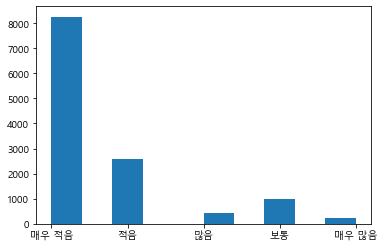

In [245]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #한글 폰트 적용시
plt.hist(df_schoolzone2['cctv_cnt_bins'])  

## 7. 통합

### 7.1 병합

#### 7.1.1 행간 병합

In [ ]:
df_all = df1.append(df2, ignore_index=True) #ignore_index=True는 열 이름을 무시, 반대는 열 이름을 적용 

#### 7.1.2 항목 명칭 및 순서가 동일한 데이터프레임간 병합 - 좀 더 빠르다고 함

In [ ]:
# 항목 명칭 (및 순서가) 동일한 데이터프레임간 병합 
df_all = pd.concat([df_2015, df_2016, df_2017 ])

### 7.2 Join

#### 7.2.1 속성조인  
Pandas Cheat Sheet의 Combine Data Sets 참조 - left/ right/ inner/ outer

In [ ]:
pd.merge(df1, df2, on='ID')  #다수 열을 Key 컬럼으로 적용 가능 

#### 7.2.2 공간조인 - 12. 공간조인과 속성조인에서....

  
     
        
# 수고 많으셨습니다~ ~ ~ ~ ~ ~ !!! 